In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('flights_total_ATL_Cancelled.csv')

In [3]:
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CANCELLED,DISTANCE,ELEVATION,Ort_Rüzgar,Kar,...,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VLD,DEST_VPS,DEST_XNA
0,0,2019,1,5,6,0,563,307.8,13.42,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2019,1,5,6,0,106,307.8,13.42,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2019,1,5,6,0,503,307.8,13.42,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2019,1,5,6,0,577,307.8,13.42,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2019,1,5,6,0,577,307.8,13.42,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.drop(['Unnamed: 0', 'ELEVATION', 'Kar'], axis=1)

In [5]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CANCELLED,DISTANCE,Ort_Rüzgar,Ort_Sýcaklýk,TMAX,TMIN,...,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TYS,DEST_VLD,DEST_VPS,DEST_XNA
0,2019,1,5,6,0,563,13.42,49,59,44,...,0,0,0,0,0,0,0,0,0,0
1,2019,1,5,6,0,106,13.42,49,59,44,...,0,0,0,0,0,0,0,0,0,0
2,2019,1,5,6,0,503,13.42,49,59,44,...,0,0,0,0,0,0,0,0,0,0
3,2019,1,5,6,0,577,13.42,49,59,44,...,0,0,0,0,0,0,0,0,0,0
4,2019,1,5,6,0,577,13.42,49,59,44,...,0,0,0,0,0,0,0,0,0,0


cancelled class of 1 and 0:
 0    392603
1      2406
Name: CANCELLED, dtype: int64


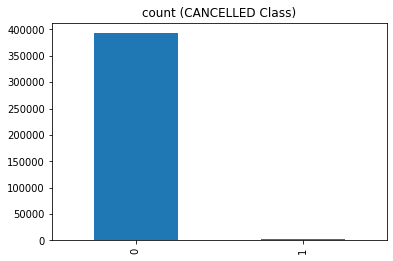

In [6]:
print("cancelled class of 1 and 0:\n",df['CANCELLED'].value_counts())# plot the count after under-sampeling
df['CANCELLED'].value_counts().plot(kind='bar', title='count (CANCELLED Class)');

In [7]:
df.shape

(395009, 195)

In [8]:
def feature_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [9]:
x = df.drop(columns = ['CANCELLED'])
y = df['CANCELLED']

# Logistic Regression

## Logistic Regression Base Model

In [10]:
x_lr_imbalanced_train, x_lr_imbalanced_test, y_lr_imbalanced_train, y_lr_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [11]:
print("counts of label '1': {}".format(sum(y_lr_imbalanced_train == 1)))
print("counts of label '0': {} \n".format(sum(y_lr_imbalanced_train == 0)))

counts of label '1': 2210
counts of label '0': 274296 



In [12]:
lr_imbalanced= LogisticRegression().fit(x_lr_imbalanced_train, y_lr_imbalanced_train)
lr_imbalanced_pred = lr_imbalanced.predict(x_lr_imbalanced_test)
lr_imbalanced.score(x_lr_imbalanced_test, y_lr_imbalanced_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9983460334337527

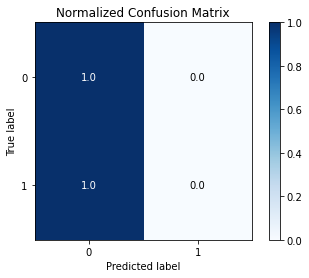

In [13]:
skplt.metrics.plot_confusion_matrix(y_lr_imbalanced_test, lr_imbalanced_pred, normalize=True)
plt.show()

## Logistic Regression with SMOTE

In [14]:
x_lr_balanced_with_smote_train, x_lr_balanced_with_smote_test, y_lr_balanced_with_smote_train, y_lr_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_lr_balanced_with_smote_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_lr_balanced_with_smote_train == 0)))

Before OverSampling, counts of label '1': 2210
Before OverSampling, counts of label '0': 274296 



In [16]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_lr_balanced_with_smote_train_reshape, y_lr_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_lr_balanced_with_smote_train, y_lr_balanced_with_smote_train)

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(x_lr_balanced_with_smote_train_reshape.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_lr_balanced_with_smote_train_reshape.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_lr_balanced_with_smote_train_reshape == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_lr_balanced_with_smote_train_reshape == 0)))

After OverSampling, the shape of train_X: (548592, 194)
After OverSampling, the shape of train_y: (548592,) 

After OverSampling, counts of label '1': 274296
After OverSampling, counts of label '0': 274296


In [18]:
lr_balanced_with_smote= LogisticRegression().fit(x_lr_balanced_with_smote_train_reshape, y_lr_balanced_with_smote_train_reshape)
lr_balanced_with_smote_pred = lr_balanced_with_smote.predict(x_lr_balanced_with_smote_test)
lr_balanced_with_smote.score(x_lr_balanced_with_smote_test, y_lr_balanced_with_smote_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.44933039669881775

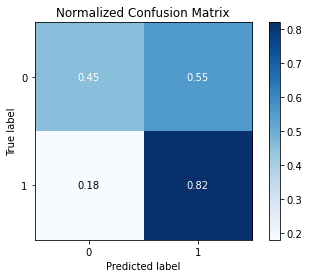

In [19]:
skplt.metrics.plot_confusion_matrix(y_lr_balanced_with_smote_test, lr_balanced_with_smote_pred, normalize=True)
plt.show()

# AdaBoost

## AdaBoost Base Model

In [20]:
x_ada_imbalanced_train, x_ada_imbalanced_test, y_ada_imbalanced_train, y_ada_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [21]:
print("counts of label '1': {}".format(sum(y_ada_imbalanced_train == 1)))
print("counts of label '0': {} \n".format(sum(y_ada_imbalanced_train == 0)))

counts of label '1': 2210
counts of label '0': 274296 



In [22]:
ada_imbalanced= AdaBoostClassifier().fit(x_ada_imbalanced_train, y_ada_imbalanced_train)
ada_imbalanced_pred = ada_imbalanced.predict(x_ada_imbalanced_test)
ada_imbalanced.score(x_ada_imbalanced_test, y_ada_imbalanced_test)

0.9962363822012945

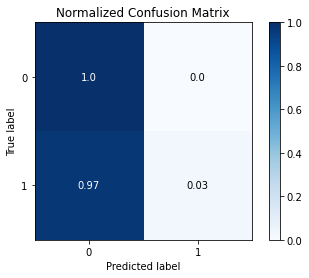

In [23]:
skplt.metrics.plot_confusion_matrix(y_ada_imbalanced_test, ada_imbalanced_pred, normalize=True)
plt.show()

## AdaBoost Model with SMOTE

In [24]:
x_ada_balanced_with_smote_train, x_ada_balanced_with_smote_test, y_ada_balanced_with_smote_train, y_ada_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [25]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_ada_balanced_with_smote_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_ada_balanced_with_smote_train == 0)))

Before OverSampling, counts of label '1': 2210
Before OverSampling, counts of label '0': 274296 



In [26]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ada_balanced_with_smote_train_reshape, y_ada_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_ada_balanced_with_smote_train, y_ada_balanced_with_smote_train)

In [27]:
print('After OverSampling, the shape of train_X: {}'.format(x_ada_balanced_with_smote_train_reshape.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_ada_balanced_with_smote_train_reshape.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_ada_balanced_with_smote_train_reshape == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_ada_balanced_with_smote_train_reshape == 0)))

After OverSampling, the shape of train_X: (548592, 194)
After OverSampling, the shape of train_y: (548592,) 

After OverSampling, counts of label '1': 274296
After OverSampling, counts of label '0': 274296


In [28]:
ada_balanced_with_smote= AdaBoostClassifier().fit(x_ada_balanced_with_smote_train_reshape, y_ada_balanced_with_smote_train_reshape)
ada_balanced_with_smote_pred = ada_balanced_with_smote.predict(x_ada_balanced_with_smote_test)
ada_balanced_with_smote.score(x_ada_balanced_with_smote_test, y_ada_balanced_with_smote_test)

0.6871471608313714

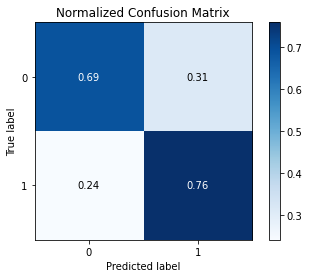

In [29]:
skplt.metrics.plot_confusion_matrix(y_ada_balanced_with_smote_test, ada_balanced_with_smote_pred, normalize=True)
plt.show()

## AdaBoost Feature Importance

In [30]:
len(ada_balanced_with_smote.feature_importances_)

194

In [31]:
ada_balanced_with_smote.feature_importances_

array([0.  , 0.02, 0.04, 0.02, 0.04, 0.14, 0.04, 0.02, 0.12, 0.  , 0.  ,
       0.06, 0.04, 0.  , 0.02, 0.1 , 0.  , 0.02, 0.  , 0.04, 0.02, 0.04,
       0.02, 0.06, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.

In [32]:
pd.set_option('display.max_rows', None)
feature_importance_columns_ada_balanced_with_smote = feature_importance(ada_balanced_with_smote, x);
feature_importance_columns_ada_balanced_with_smote

,columns,importance
5,Ort_Rüzgar,0.14
8,TMIN,0.12
15,OP_CARRIER_DL,0.10
23,OP_CARRIER_WN,0.06
11,OP_CARRIER_9E,0.06
21,OP_CARRIER_OO,0.04
2,DAY_OF_MONTH,0.04
4,DISTANCE,0.04
6,Ort_Sýcaklýk,0.04
19,OP_CARRIER_NK,0.04


In [33]:
feature_importance_drop_ada_balanced_with_smote = feature_importance_columns_ada_balanced_with_smote[feature_importance_columns_ada_balanced_with_smote.importance > 0.005]

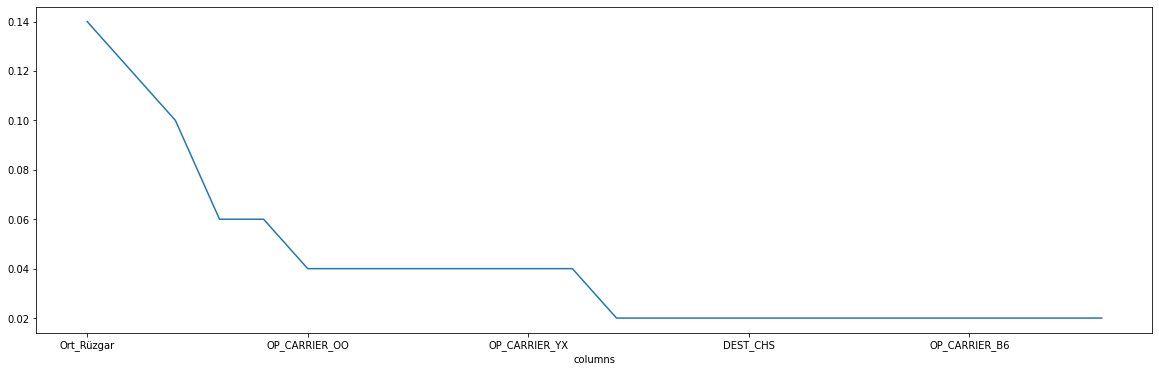

In [34]:
feature_importance_drop_ada_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [35]:
keep_columns_ada_balanced_with_smote = feature_importance_columns_ada_balanced_with_smote[feature_importance_columns_ada_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_ada_balanced_with_smote)

24

In [36]:
keep_columns_ada_balanced_with_smote

5         Ort_Rüzgar
8               TMIN
15     OP_CARRIER_DL
23     OP_CARRIER_WN
11     OP_CARRIER_9E
21     OP_CARRIER_OO
2       DAY_OF_MONTH
4           DISTANCE
6       Ort_Sýcaklýk
19     OP_CARRIER_NK
25     OP_CARRIER_YX
12     OP_CARRIER_AA
22     OP_CARRIER_UA
157         DEST_RDU
143         DEST_ORD
55          DEST_CHS
1              MONTH
20     OP_CARRIER_OH
149         DEST_PHX
17     OP_CARRIER_F9
14     OP_CARRIER_B6
103         DEST_IAH
7               TMAX
3        DAY_OF_WEEK
Name: columns, dtype: object

### AdaBoost Feature Importance Model

In [37]:
df_keep_ada_balanced_with_smote = df[keep_columns_ada_balanced_with_smote]
x_ada_feature_importance = df_keep_ada_balanced_with_smote
y_ada_feature_importance = df['CANCELLED']
x_ada_feature_importance_train, x_ada_feature_importance_test, y_ada_feature_importance_train, y_ada_feature_importance_test =     train_test_split(x_ada_feature_importance, y_ada_feature_importance, test_size=0.30, shuffle=False)

In [38]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ada_feature_importance_train_reshape, y_ada_feature_importance_train_reshape = smote_reshape.fit_resample(x_ada_feature_importance_train, y_ada_feature_importance_train)

In [39]:
ada_balanced_with_smote_feature_importance= AdaBoostClassifier().fit(x_ada_feature_importance_train_reshape,                                                                                            y_ada_feature_importance_train_reshape)
ada_balanced_with_smote_feature_importance_pred = ada_balanced_with_smote_feature_importance.predict(x_ada_feature_importance_test)
ada_balanced_with_smote_feature_importance.score(x_ada_feature_importance_test, y_ada_feature_importance_test)

0.6791895563825389

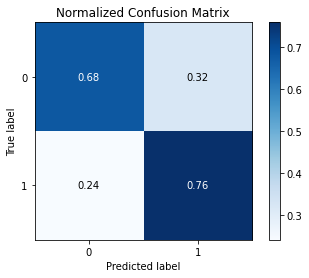

In [40]:
skplt.metrics.plot_confusion_matrix(y_ada_feature_importance_test, ada_balanced_with_smote_feature_importance_pred, normalize=True)
plt.show()

# Gradient Boosting

## Gradient Boosting Base Model

In [41]:
x_gbc_imbalanced_train, x_gbc_imbalanced_test, y_gbc_imbalanced_train, y_gbc_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [42]:
gbc_imbalanced= GradientBoostingClassifier().fit(x_gbc_imbalanced_train,                                                                                                            y_gbc_imbalanced_train)
gbc_imbalanced_pred = gbc_imbalanced.predict(x_gbc_imbalanced_test)
gbc_imbalanced.score(x_gbc_imbalanced_test, y_gbc_imbalanced_test)

0.9978987873724716

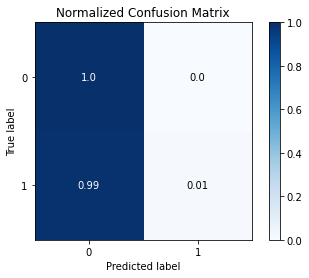

In [43]:
skplt.metrics.plot_confusion_matrix(y_gbc_imbalanced_test, gbc_imbalanced_pred, normalize=True)
plt.show()

## Gradient Boosting Model with SMOTE

In [44]:
x_gbc_balanced_with_smote_train, x_gbc_balanced_with_smote_test, y_gbc_balanced_with_smote_train, y_gbc_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [45]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_gbc_balanced_with_smote_train_reshape, y_gbc_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_gbc_balanced_with_smote_train, y_gbc_balanced_with_smote_train)

In [46]:
gbc_balanced_with_smote= GradientBoostingClassifier().fit(x_gbc_balanced_with_smote_train_reshape,                                                                                           y_gbc_balanced_with_smote_train_reshape)
gbc_balanced_with_smote_pred = gbc_balanced_with_smote.predict(x_gbc_balanced_with_smote_test)
gbc_balanced_with_smote.score(x_gbc_balanced_with_smote_test, y_gbc_balanced_with_smote_test)

0.8619275461380724

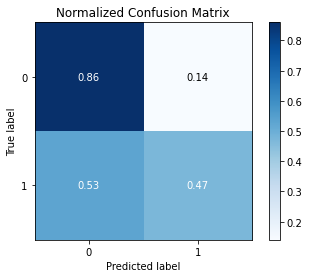

In [47]:
skplt.metrics.plot_confusion_matrix(y_gbc_balanced_with_smote_test, gbc_balanced_with_smote_pred, normalize=True)
plt.show()

## Gradient Boosting Feature Importance

In [48]:
len(gbc_balanced_with_smote.feature_importances_)

194

In [49]:
gbc_balanced_with_smote.feature_importances_

array([0.00000000e+00, 7.11980508e-02, 4.27081253e-02, 1.04268994e-02,
       2.12660694e-02, 3.54015348e-02, 2.04794432e-02, 7.15127178e-03,
       5.03030058e-02, 1.50504574e-02, 1.17412256e-02, 8.21410362e-02,
       7.82726863e-03, 1.79885131e-03, 9.98258547e-03, 4.50827719e-01,
       5.77346856e-04, 1.33599181e-02, 0.00000000e+00, 2.14259950e-02,
       5.19810746e-04, 8.21240212e-02, 6.16938499e-03, 1.51104731e-02,
       1.45326236e-03, 7.24768773e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.06884409e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [50]:
pd.set_option('display.max_rows', None)
feature_importance_columns_gbc_balanced_with_smote = feature_importance(gbc_balanced_with_smote, x);
feature_importance_columns_gbc_balanced_with_smote

,columns,importance
15,OP_CARRIER_DL,0.450828
11,OP_CARRIER_9E,0.082141
21,OP_CARRIER_OO,0.082124
1,MONTH,0.071198
8,TMIN,0.050303
2,DAY_OF_MONTH,0.042708
5,Ort_Rüzgar,0.035402
19,OP_CARRIER_NK,0.021426
4,DISTANCE,0.021266
6,Ort_Sýcaklýk,0.020479


In [51]:
feature_importance_drop_gbc_balanced_with_smote = feature_importance_columns_gbc_balanced_with_smote[feature_importance_columns_gbc_balanced_with_smote.importance > 0.005]

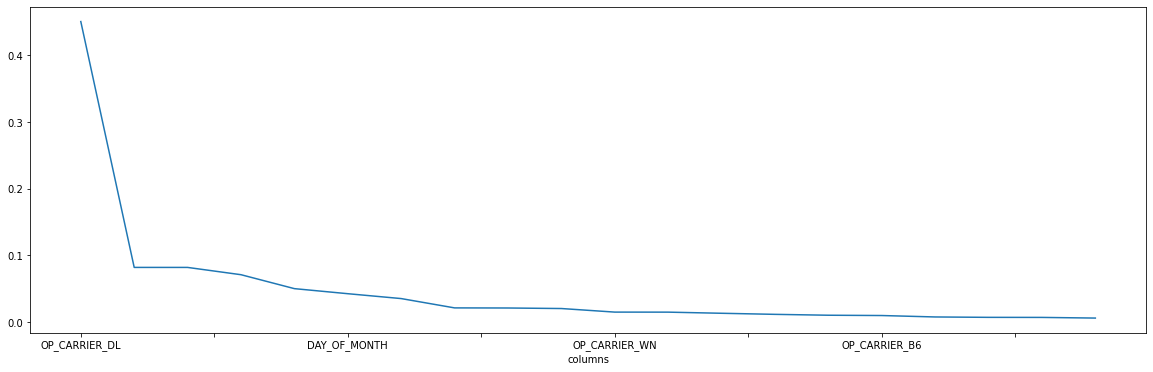

In [52]:
feature_importance_drop_gbc_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [53]:
keep_columns_gbc_balanced_with_smote = feature_importance_columns_gbc_balanced_with_smote[feature_importance_columns_gbc_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_gbc_balanced_with_smote)

20

In [54]:
keep_columns_gbc_balanced_with_smote

15     OP_CARRIER_DL
11     OP_CARRIER_9E
21     OP_CARRIER_OO
1              MONTH
8               TMIN
2       DAY_OF_MONTH
5         Ort_Rüzgar
19     OP_CARRIER_NK
4           DISTANCE
6       Ort_Sýcaklýk
23     OP_CARRIER_WN
9     2Dk_max_rüzgar
17     OP_CARRIER_F9
10    5Dk_max_rüzgar
3        DAY_OF_WEEK
14     OP_CARRIER_B6
12     OP_CARRIER_AA
25     OP_CARRIER_YX
7               TMAX
22     OP_CARRIER_UA
Name: columns, dtype: object

### Gradient Feature Importance Model

In [55]:
df_keep_gbc_balanced_with_smote = df[keep_columns_gbc_balanced_with_smote]
x_gbc_feature_importance = df_keep_gbc_balanced_with_smote
y_gbc_feature_importance = df['CANCELLED']
x_gbc_feature_importance_train, x_gbc_feature_importance_test, y_gbc_feature_importance_train, y_gbc_feature_importance_test =     train_test_split(x_gbc_feature_importance, y_gbc_feature_importance, test_size=0.30, shuffle=False)

In [56]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_gbc_feature_importance_train_reshape, y_gbc_feature_importance_train_reshape = smote_reshape.fit_resample(x_gbc_feature_importance_train, y_gbc_feature_importance_train)

In [57]:
gbc_balanced_with_smote_feature_importance= GradientBoostingClassifier().fit(x_gbc_feature_importance_train_reshape,                                                                                            y_gbc_feature_importance_train_reshape)
gbc_balanced_with_smote_feature_importance_pred = gbc_balanced_with_smote_feature_importance.predict(x_gbc_feature_importance_test)
gbc_balanced_with_smote_feature_importance.score(x_gbc_feature_importance_test, y_gbc_feature_importance_test)

0.8536239588871167

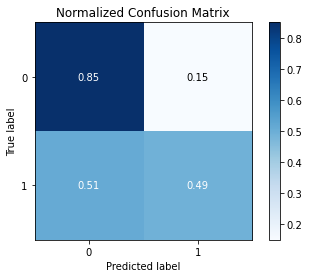

In [58]:
skplt.metrics.plot_confusion_matrix(y_gbc_feature_importance_test, gbc_balanced_with_smote_feature_importance_pred, normalize=True)
plt.show()

# Random Forest

## Random Forest Base Model

In [59]:
x_rf_imbalanced_train, x_rf_imbalanced_test, y_rf_imbalanced_train, y_rf_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [60]:
rf_imbalanced= RandomForestClassifier().fit(x_rf_imbalanced_train,                                                                                                             y_rf_imbalanced_train)
rf_imbalanced_pred = rf_imbalanced.predict(x_rf_imbalanced_test)
rf_imbalanced.score(x_rf_imbalanced_test, y_rf_imbalanced_test)

0.9983291562238931

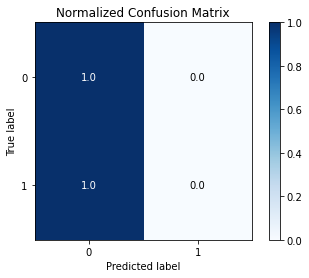

In [61]:
skplt.metrics.plot_confusion_matrix(y_rf_imbalanced_test, rf_imbalanced_pred, normalize=True)
plt.show()

## Random Forest Model with SMOTE

In [62]:
x_rf_balanced_with_smote_train, x_rf_balanced_with_smote_test, y_rf_balanced_with_smote_train, y_rf_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [63]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_rf_balanced_with_smote_train_reshape, y_rf_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_rf_balanced_with_smote_train, y_rf_balanced_with_smote_train)

In [64]:
rf_balanced_with_smote= RandomForestClassifier().fit(x_rf_balanced_with_smote_train_reshape,                                                                                            y_rf_balanced_with_smote_train_reshape)
rf_balanced_with_smote_pred = rf_balanced_with_smote.predict(x_rf_balanced_with_smote_test)
rf_balanced_with_smote.score(x_rf_balanced_with_smote_test, y_rf_balanced_with_smote_test)

0.9888694800975503

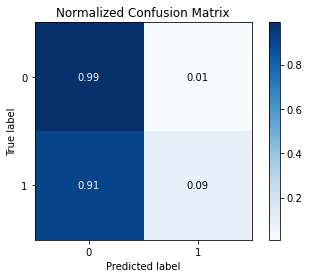

In [65]:
skplt.metrics.plot_confusion_matrix(y_rf_balanced_with_smote_test, rf_balanced_with_smote_pred, normalize=True)
plt.show()

## Random Forest Feature Importance

In [66]:
len(rf_balanced_with_smote.feature_importances_)

194

In [67]:
rf_balanced_with_smote.feature_importances_

array([0.00000000e+00, 4.15889766e-02, 5.45514957e-02, 3.49657058e-02,
       6.30224991e-02, 6.61302189e-02, 4.83736854e-02, 4.64983557e-02,
       5.64142823e-02, 6.04125281e-02, 5.77812064e-02, 2.89641816e-02,
       6.90498081e-03, 3.41882584e-04, 3.92385807e-03, 2.33480252e-01,
       3.17432367e-04, 4.85477004e-03, 5.60287367e-04, 9.15181979e-03,
       1.12977357e-03, 2.14467453e-02, 3.83254840e-03, 2.89906761e-02,
       1.32675990e-03, 4.63081909e-03, 1.84983134e-04, 5.12113214e-05,
       2.12447963e-04, 6.41701891e-05, 3.98963564e-04, 6.20199004e-04,
       6.82162449e-05, 4.35038778e-06, 3.94543769e-05, 2.35296389e-04,
       9.21282436e-04, 4.72548252e-04, 2.13108698e-05, 2.76347037e-04,
       4.59067603e-04, 2.57371573e-04, 1.66381305e-03, 1.44297288e-03,
       3.80871716e-04, 5.68517223e-04, 5.80343927e-05, 3.84614199e-04,
       1.03216911e-05, 2.54418682e-03, 6.89041132e-06, 1.04175860e-03,
       1.76374557e-04, 4.94810567e-04, 4.83701621e-04, 1.15990119e-03,
      

In [68]:
pd.set_option('display.max_rows', None)
feature_importance_columns_rf_balanced_with_smote = feature_importance(rf_balanced_with_smote, x);
feature_importance_columns_rf_balanced_with_smote

,columns,importance
15,OP_CARRIER_DL,2.334803e-01
5,Ort_Rüzgar,6.613022e-02
4,DISTANCE,6.302250e-02
9,2Dk_max_rüzgar,6.041253e-02
10,5Dk_max_rüzgar,5.778121e-02
8,TMIN,5.641428e-02
2,DAY_OF_MONTH,5.455150e-02
6,Ort_Sýcaklýk,4.837369e-02
7,TMAX,4.649836e-02
1,MONTH,4.158898e-02


In [69]:
feature_importance_drop_rf_balanced_with_smote = feature_importance_columns_rf_balanced_with_smote[feature_importance_columns_rf_balanced_with_smote.importance > 0.005]

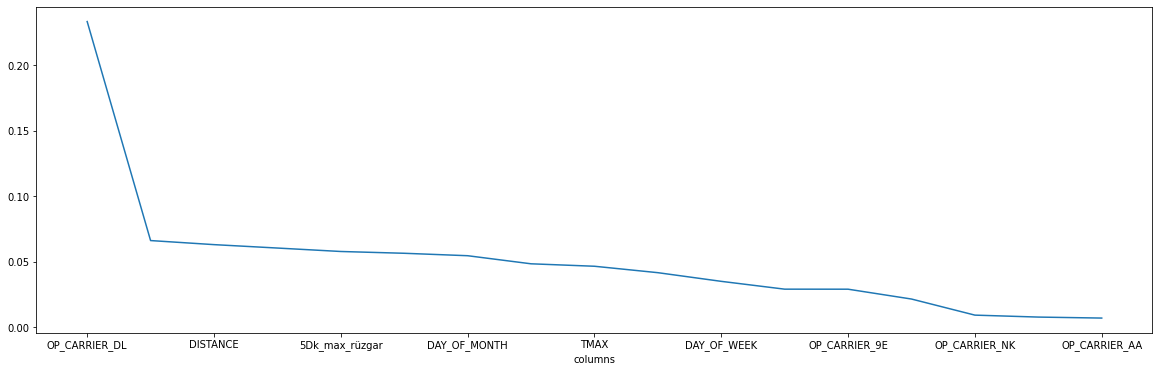

In [70]:
feature_importance_drop_rf_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [71]:
keep_columns_rf_balanced_with_smote = feature_importance_columns_rf_balanced_with_smote[feature_importance_columns_rf_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_rf_balanced_with_smote)

17

In [72]:
keep_columns_rf_balanced_with_smote

15      OP_CARRIER_DL
5          Ort_Rüzgar
4            DISTANCE
9      2Dk_max_rüzgar
10     5Dk_max_rüzgar
8                TMIN
2        DAY_OF_MONTH
6        Ort_Sýcaklýk
7                TMAX
1               MONTH
3         DAY_OF_WEEK
23      OP_CARRIER_WN
11      OP_CARRIER_9E
21      OP_CARRIER_OO
19      OP_CARRIER_NK
143          DEST_ORD
12      OP_CARRIER_AA
Name: columns, dtype: object

### Random Forest Feature Importance Model

In [73]:
df_keep_rf_balanced_with_smote = df[keep_columns_rf_balanced_with_smote]
x_rf_feature_importance = df_keep_rf_balanced_with_smote
y_rf_feature_importance = df['CANCELLED']
x_rf_feature_importance_train, x_rf_feature_importance_test, y_rf_feature_importance_train, y_rf_feature_importance_test =     train_test_split(x_rf_feature_importance, y_rf_feature_importance, test_size=0.30, shuffle=False)

In [74]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_rf_feature_importance_train_reshape, y_rf_feature_importance_train_reshape = smote_reshape.fit_resample(x_rf_feature_importance_train, y_rf_feature_importance_train)

In [75]:
rf_balanced_with_smote_feature_importance= RandomForestClassifier().fit(x_rf_feature_importance_train_reshape,                                                                                             y_rf_feature_importance_train_reshape)
rf_balanced_with_smote_feature_importance_pred = rf_balanced_with_smote_feature_importance.predict(x_rf_feature_importance_test)
rf_balanced_with_smote_feature_importance.score(x_rf_feature_importance_test, y_rf_feature_importance_test)

0.9392673603199919

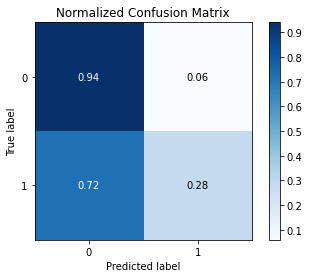

In [76]:
skplt.metrics.plot_confusion_matrix(y_rf_feature_importance_test, rf_balanced_with_smote_feature_importance_pred, normalize=True)
plt.show()

# ExtraTrees 

## ExtraTrees Base Model

In [77]:
x_ext_imbalanced_train, x_ext_imbalanced_test, y_ext_imbalanced_train, y_ext_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [78]:
ext_imbalanced= ExtraTreesClassifier().fit(x_ext_imbalanced_train,                                                                                                            y_ext_imbalanced_train)
ext_imbalanced_pred = ext_imbalanced.predict(x_ext_imbalanced_test)
ext_imbalanced.score(x_ext_imbalanced_test, y_ext_imbalanced_test)

0.9983291562238931

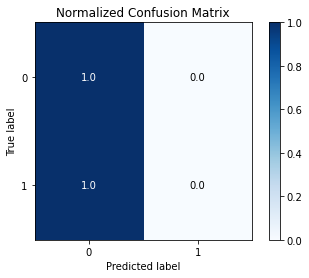

In [79]:
skplt.metrics.plot_confusion_matrix(y_ext_imbalanced_test, ext_imbalanced_pred, normalize=True)
plt.show()

## ExtraTrees Model with SMOTE

In [80]:
x_ext_balanced_with_smote_train, x_ext_balanced_with_smote_test, y_ext_balanced_with_smote_train, y_ext_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [81]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ext_balanced_with_smote_train_reshape, y_ext_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_ext_balanced_with_smote_train, y_ext_balanced_with_smote_train)

In [82]:
ext_balanced_with_smote= ExtraTreesClassifier().fit(x_ext_balanced_with_smote_train_reshape,                                                                                           y_ext_balanced_with_smote_train_reshape)
ext_balanced_with_smote_pred = ext_balanced_with_smote.predict(x_ext_balanced_with_smote_test)
ext_balanced_with_smote.score(x_ext_balanced_with_smote_test, y_ext_balanced_with_smote_test)

0.9881100056538653

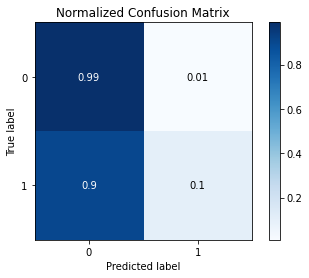

In [83]:
skplt.metrics.plot_confusion_matrix(y_ext_balanced_with_smote_test, ext_balanced_with_smote_pred, normalize=True)
plt.show()

## ExtraTrees Feature Importance

In [84]:
len(ext_balanced_with_smote.feature_importances_)

194

In [85]:
ext_balanced_with_smote.feature_importances_

array([0.00000000e+00, 5.17970839e-02, 5.12182506e-02, 4.01209274e-02,
       1.89478471e-02, 3.96458808e-02, 4.15001426e-02, 4.18099625e-02,
       4.41796515e-02, 3.55776421e-02, 3.58099246e-02, 3.28249951e-02,
       9.00025906e-03, 4.80788624e-04, 6.24544724e-03, 2.69372881e-01,
       6.48639238e-04, 7.00918612e-03, 8.34192287e-04, 1.30008305e-02,
       1.74258858e-03, 3.00859414e-02, 5.83573572e-03, 3.16527066e-02,
       1.84352286e-03, 7.28443613e-03, 2.41904883e-04, 8.70666311e-05,
       4.50625618e-04, 1.80890886e-04, 6.07047811e-04, 8.34166938e-04,
       1.35253604e-04, 7.71087592e-06, 4.34854534e-05, 2.87811959e-04,
       1.36937494e-03, 8.40547169e-04, 2.87812542e-05, 5.64396221e-04,
       7.27712592e-04, 4.66899861e-04, 1.71804188e-03, 1.81614827e-03,
       6.59319066e-04, 8.33326412e-04, 8.03779311e-05, 6.14460558e-04,
       1.68627763e-05, 2.85289111e-03, 1.13993068e-05, 1.53773621e-03,
       3.70261679e-04, 7.81844296e-04, 9.61416508e-04, 3.38400915e-03,
      

In [86]:
pd.set_option('display.max_rows', None)
feature_importance_columns_ext_balanced_with_smote = feature_importance(ext_balanced_with_smote, x);
feature_importance_columns_ext_balanced_with_smote

,columns,importance
15,OP_CARRIER_DL,2.693729e-01
1,MONTH,5.179708e-02
2,DAY_OF_MONTH,5.121825e-02
8,TMIN,4.417965e-02
7,TMAX,4.180996e-02
6,Ort_Sýcaklýk,4.150014e-02
3,DAY_OF_WEEK,4.012093e-02
5,Ort_Rüzgar,3.964588e-02
10,5Dk_max_rüzgar,3.580992e-02
9,2Dk_max_rüzgar,3.557764e-02


In [87]:
feature_importance_drop_ext_balanced_with_smote = feature_importance_columns_ext_balanced_with_smote[feature_importance_columns_ext_balanced_with_smote.importance > 0.005]

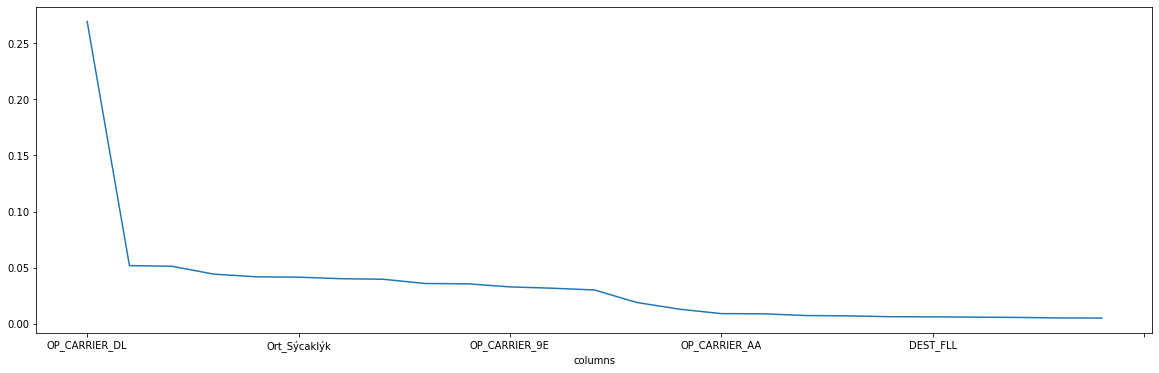

In [88]:
feature_importance_drop_ext_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [89]:
keep_columns_ext_balanced_with_smote = feature_importance_columns_ext_balanced_with_smote[feature_importance_columns_ext_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_ext_balanced_with_smote)

25

In [90]:
keep_columns_ext_balanced_with_smote

15      OP_CARRIER_DL
1               MONTH
2        DAY_OF_MONTH
8                TMIN
7                TMAX
6        Ort_Sýcaklýk
3         DAY_OF_WEEK
5          Ort_Rüzgar
10     5Dk_max_rüzgar
9      2Dk_max_rüzgar
11      OP_CARRIER_9E
23      OP_CARRIER_WN
21      OP_CARRIER_OO
4            DISTANCE
19      OP_CARRIER_NK
12      OP_CARRIER_AA
143          DEST_ORD
25      OP_CARRIER_YX
17      OP_CARRIER_F9
14      OP_CARRIER_B6
84           DEST_FLL
22      OP_CARRIER_UA
120          DEST_MCO
145          DEST_PBI
116          DEST_LGA
Name: columns, dtype: object

### ExtraTrees Feature Importance Model

In [91]:
df_keep_ext_balanced_with_smote = df[keep_columns_ext_balanced_with_smote]
x_ext_feature_importance = df_keep_ext_balanced_with_smote
y_ext_feature_importance = df['CANCELLED']
x_ext_feature_importance_train, x_ext_feature_importance_test, y_ext_feature_importance_train, y_ext_feature_importance_test =     train_test_split(x_ext_feature_importance, y_ext_feature_importance, test_size=0.30, shuffle=False)

In [92]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_ext_feature_importance_train_reshape, y_ext_feature_importance_train_reshape = smote_reshape.fit_resample(x_ext_feature_importance_train, y_ext_feature_importance_train)

In [93]:
ext_balanced_with_smote_feature_importance= ExtraTreesClassifier().fit(x_ext_feature_importance_train_reshape,                                                                                             y_ext_feature_importance_train_reshape)
ext_balanced_with_smote_feature_importance_pred = ext_balanced_with_smote_feature_importance.predict(x_ext_feature_importance_test)
ext_balanced_with_smote_feature_importance.score(x_ext_feature_importance_test, y_ext_feature_importance_test)

0.9252423989266094

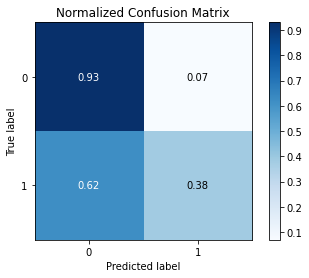

In [94]:
skplt.metrics.plot_confusion_matrix(y_ext_feature_importance_test, ext_balanced_with_smote_feature_importance_pred, normalize=True)
plt.show()

# XGBoost

## XGBoost Base Model

In [95]:
x_xgb_imbalanced_train, x_xgb_imbalanced_test, y_xgb_imbalanced_train, y_xgb_imbalanced_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [96]:
xgb_imbalanced= XGBClassifier().fit(x_xgb_imbalanced_train, y_xgb_imbalanced_train)
xgb_imbalanced_pred = xgb_imbalanced.predict(x_xgb_imbalanced_test)
xgb_imbalanced.score(x_xgb_imbalanced_test, y_xgb_imbalanced_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpti

0.9980928752858578

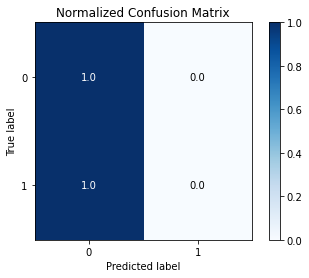

In [97]:
skplt.metrics.plot_confusion_matrix(y_xgb_imbalanced_test, xgb_imbalanced_pred, normalize=True)
plt.show()

## XGBoost Model with SMOTE

In [98]:
x_xgb_balanced_with_smote_train, x_xgb_balanced_with_smote_test, y_xgb_balanced_with_smote_train, y_xgb_balanced_with_smote_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [99]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_xgb_balanced_with_smote_train_reshape, y_xgb_balanced_with_smote_train_reshape = smote_reshape.fit_resample                                                                                       (x_xgb_balanced_with_smote_train, y_xgb_balanced_with_smote_train)

In [100]:
xgb_balanced_with_smote= XGBClassifier().fit(x_xgb_balanced_with_smote_train_reshape,                                                                                           y_xgb_balanced_with_smote_train_reshape)
xgb_balanced_with_smote_pred = xgb_balanced_with_smote.predict(x_xgb_balanced_with_smote_test)
xgb_balanced_with_smote.score(x_xgb_balanced_with_smote_test, y_xgb_balanced_with_smote_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpti

0.9718572525590069

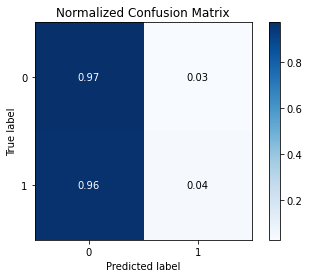

In [101]:
skplt.metrics.plot_confusion_matrix(y_xgb_balanced_with_smote_test, xgb_balanced_with_smote_pred, normalize=True)
plt.show()

## XGBoost Feature Importance

In [102]:
len(xgb_balanced_with_smote.feature_importances_)

194

In [103]:
xgb_balanced_with_smote.feature_importances_

array([0.00000000e+00, 1.33143328e-02, 8.84806551e-03, 4.24411334e-03,
       6.52090600e-03, 6.76206173e-03, 1.06314812e-02, 4.53917449e-03,
       9.36012994e-03, 1.03712073e-02, 5.80708031e-03, 6.77252412e-02,
       2.17014533e-02, 1.93191401e-04, 2.43098792e-02, 1.19752243e-01,
       6.52063172e-03, 3.85301076e-02, 1.00637451e-02, 3.53641994e-02,
       1.15498500e-02, 6.68550581e-02, 2.04144232e-02, 1.02104275e-02,
       1.18703898e-02, 1.97280422e-02, 1.42015622e-03, 0.00000000e+00,
       2.51300074e-03, 0.00000000e+00, 1.79960567e-03, 1.28077518e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.63093265e-03,
       1.21363613e-03, 0.00000000e+00, 0.00000000e+00, 1.48308463e-03,
       1.08678022e-03, 0.00000000e+00, 5.58400108e-03, 7.61671981e-04,
       0.00000000e+00, 8.60104244e-03, 0.00000000e+00, 1.32969338e-02,
       0.00000000e+00, 4.37778654e-03, 0.00000000e+00, 3.34921922e-03,
       1.56512600e-03, 3.40647850e-04, 0.00000000e+00, 1.34292999e-02,
      

In [104]:
pd.set_option('display.max_rows', None)
feature_importance_columns_xgb_balanced_with_smote = feature_importance(xgb_balanced_with_smote, x);
feature_importance_columns_xgb_balanced_with_smote

,columns,importance
15,OP_CARRIER_DL,0.119752
11,OP_CARRIER_9E,0.067725
21,OP_CARRIER_OO,0.066855
17,OP_CARRIER_F9,0.038530
19,OP_CARRIER_NK,0.035364
14,OP_CARRIER_B6,0.024310
12,OP_CARRIER_AA,0.021701
22,OP_CARRIER_UA,0.020414
25,OP_CARRIER_YX,0.019728
157,DEST_RDU,0.013614


In [105]:
feature_importance_drop_xgb_balanced_with_smote = feature_importance_columns_xgb_balanced_with_smote[feature_importance_columns_xgb_balanced_with_smote.importance > 0.005]

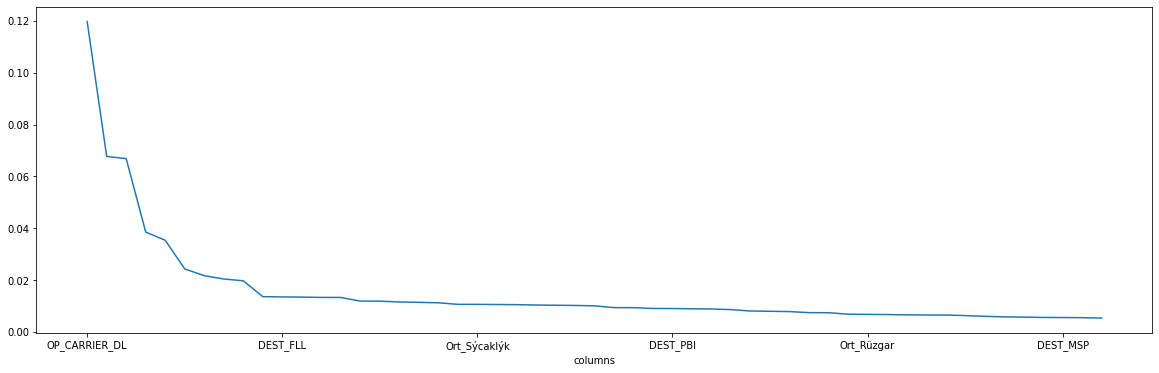

In [106]:
feature_importance_drop_xgb_balanced_with_smote.plot('columns', 'importance', figsize=(20,6), legend=False);

In [107]:
keep_columns_xgb_balanced_with_smote = feature_importance_columns_xgb_balanced_with_smote[feature_importance_columns_xgb_balanced_with_smote["importance"]>0.005]["columns"]; 
len(keep_columns_xgb_balanced_with_smote)

53

In [108]:
keep_columns_xgb_balanced_with_smote

15      OP_CARRIER_DL
11      OP_CARRIER_9E
21      OP_CARRIER_OO
17      OP_CARRIER_F9
19      OP_CARRIER_NK
14      OP_CARRIER_B6
12      OP_CARRIER_AA
22      OP_CARRIER_UA
25      OP_CARRIER_YX
157          DEST_RDU
84           DEST_FLL
55           DEST_CHS
1               MONTH
47           DEST_BUF
90           DEST_GPT
24      OP_CARRIER_YV
20      OP_CARRIER_OH
143          DEST_ORD
103          DEST_IAH
158          DEST_RIC
6        Ort_Sýcaklýk
151          DEST_PIT
94           DEST_GSP
9      2Dk_max_rüzgar
110          DEST_JAX
23      OP_CARRIER_WN
18      OP_CARRIER_MQ
135          DEST_MSY
8                TMIN
68           DEST_DEN
145          DEST_PBI
137          DEST_MYR
2        DAY_OF_MONTH
45           DEST_BTR
127          DEST_MKE
116          DEST_LGA
120          DEST_MCO
149          DEST_PHX
119          DEST_MCI
179          DEST_STL
5          Ort_Rüzgar
100          DEST_HPN
138          DEST_OAJ
4            DISTANCE
16      OP_CARRIER_EV
163       

### XGBoost Feature Importance Model

In [109]:
df_keep_xgb_balanced_with_smote = df[keep_columns_xgb_balanced_with_smote]
x_xgb_feature_importance = df_keep_xgb_balanced_with_smote
y_xgb_feature_importance = df['CANCELLED']
x_xgb_feature_importance_train, x_xgb_feature_importance_test, y_xgb_feature_importance_train, y_xgb_feature_importance_test =     train_test_split(x_xgb_feature_importance, y_xgb_feature_importance, test_size=0.30, shuffle=False)

In [110]:
smote_reshape = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=2)
x_xgb_feature_importance_train_reshape, y_xgb_feature_importance_train_reshape = smote_reshape.fit_resample(x_xgb_feature_importance_train, y_xgb_feature_importance_train)

In [111]:
xgb_balanced_with_smote_feature_importance= XGBClassifier().fit(x_xgb_feature_importance_train_reshape,                                                                                             y_xgb_feature_importance_train_reshape)
xgb_balanced_with_smote_feature_importance_pred = xgb_balanced_with_smote_feature_importance.predict(x_xgb_feature_importance_test)
xgb_balanced_with_smote_feature_importance.score(x_xgb_feature_importance_test, y_xgb_feature_importance_test)

E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
E:\Anaconda3\envs\Machine_Learning_VsCode\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumpti

0.9881015670489355

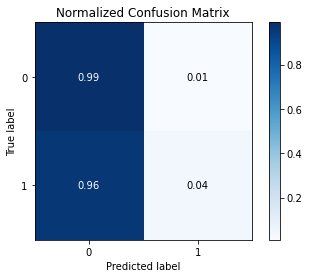

In [112]:
skplt.metrics.plot_confusion_matrix(y_xgb_feature_importance_test, xgb_balanced_with_smote_feature_importance_pred, normalize=True)
plt.show()